In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [31]:
#root_name = 'GaiaSource_003112-005263.csv'
#name = root_name + '.gz'
#fn = 'http://cdn.gea.esac.esa.int/Gaia/gedr3/gaia_source/'+name
#executable = 'wget --directory-prefix=data/GaiaSource/ '+fn
#os.system(executable)
#!wget -r -np -nH --show-progress --cut-dirs=3 -P data/GaiaSource http://cdn.gea.esac.esa.int/Gaia/gedr3/gaia_source
#!gzip -d data/GaiaSource/*

In [36]:
from astroquery.gaia import Gaia
from astropy import log
import pandas as pd

try:
    log.info("Getting the DR2 results from file...")
    data = pd.read_csv("hr_data.csv")
except OSError:
    log.info("File not found, downloading...")
    job = Gaia.launch_job_async("select top 1000000"
        " bp_rp, phot_g_mean_mag+5*log10(parallax)-10 as mg, ra, dec" 
        " from gaiadr2.gaia_source"
        " where parallax_over_error > 10"
        " and visibility_periods_used > 8"
        " and phot_g_mean_flux_over_error > 50"
        " and phot_bp_mean_flux_over_error > 20"
        " and phot_rp_mean_flux_over_error > 20"
        " and phot_bp_rp_excess_factor <"
        " 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
        " and phot_bp_rp_excess_factor >"
        " 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
        " and astrometric_chi2_al/(astrometric_n_good_obs_al-5)<"
        "1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))"
        +" and 1000/parallax <= 200",
        dump_to_file=True,
        output_format="csv",
        output_file="hr_data.csv")
    print(job)
    r = job.get_results()
    data = r.to_pandas()



INFO: Getting the DR2 results from file... [unknown]


In [37]:
#data = data[np.abs(1000.0 / (data['parallax'])) < 500]
#data.to_csv('processed.csv')
data.head

<bound method NDFrame.head of            bp_rp         mg          ra        dec
0       2.929367  10.863759  245.920535  15.302838
1       2.375217   9.288944  313.547630  40.245637
2       3.700203  12.441052  295.537043  25.590209
3       0.763462   4.538485  236.645693 -75.399888
4       0.376173   2.170155  269.279247 -13.653261
...          ...        ...         ...        ...
999995  2.374078   9.766510  304.665903  58.856252
999996  1.965882   7.795761  137.540851  17.983084
999997  0.836684   4.244815  136.834471  18.181476
999998  3.141979  11.901181  304.670847  58.907950
999999  1.453691   7.072727  138.942576  18.287723

[1000000 rows x 4 columns]>

In [38]:
import numpy as np
# Calculate colors
import utils
import importlib
importlib.reload(utils)
def index_to_temp(index):
    if index < -.25:
        index = -.25
    return 5601 / np.power(index + .3, 2.0/3.0)

temp = data.bp_rp.apply(index_to_temp)
data['color'] = temp.apply(utils.k_to_rgb)

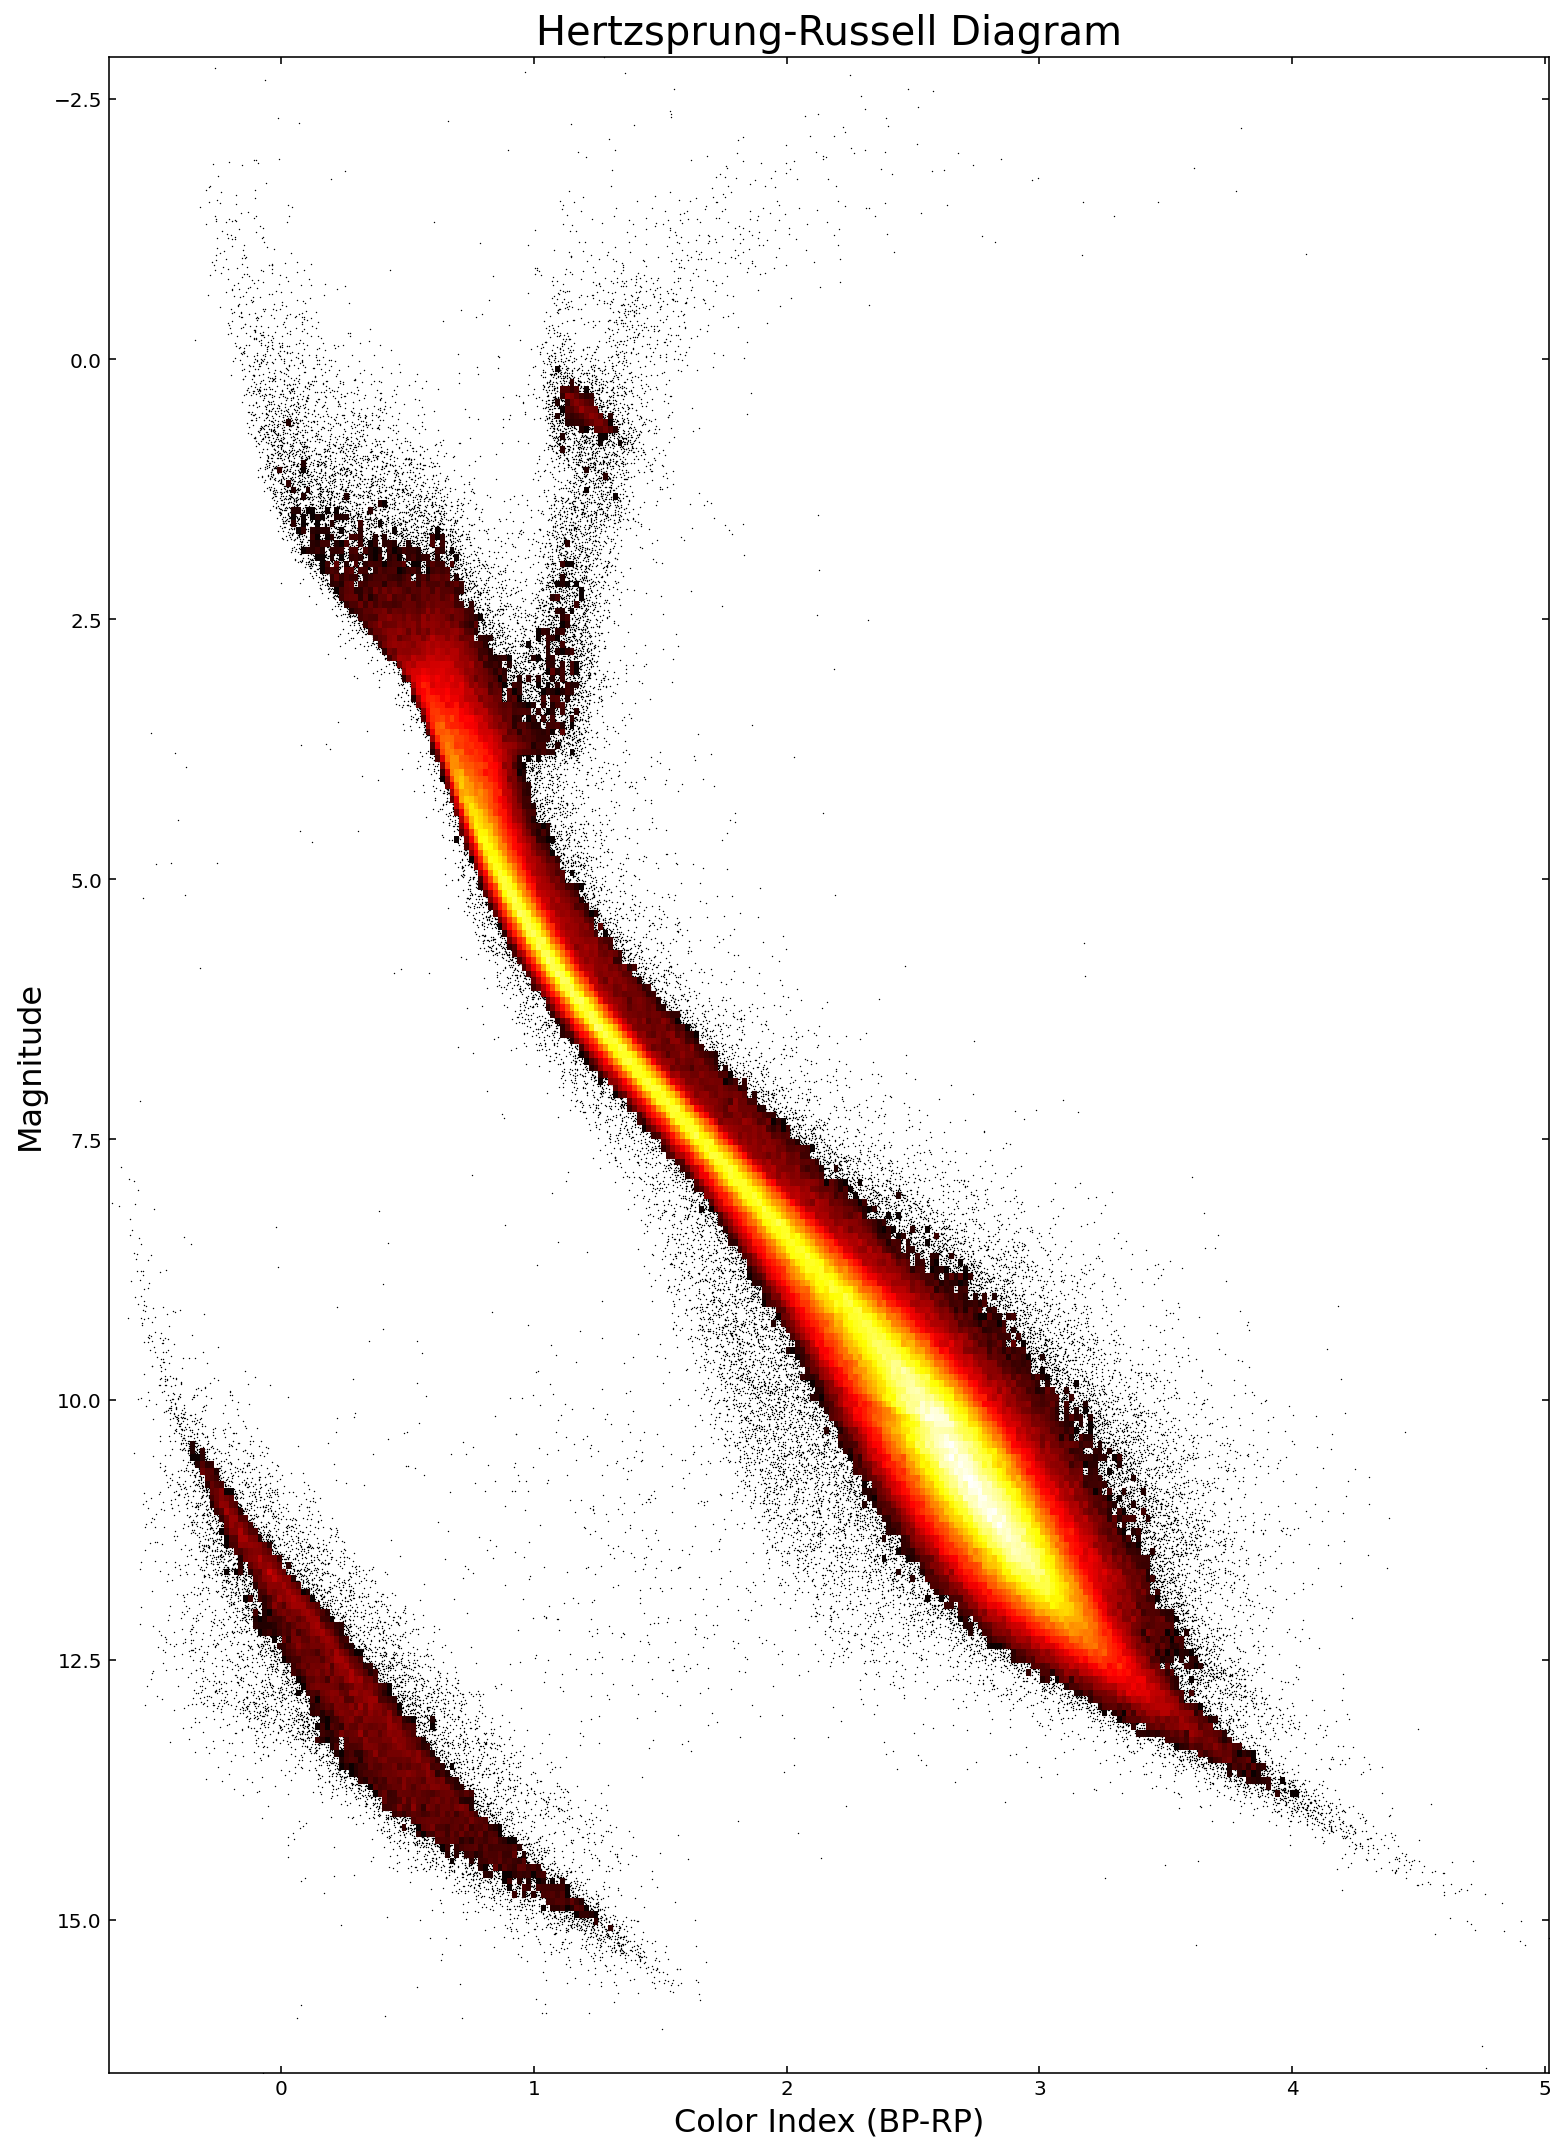

In [47]:
from matplotlib import colors
import matplotlib.pyplot as plt

fig = plt.figure(
    figsize=(10, 14),
    facecolor='white'
    )
ax = fig.add_axes([1, 1, 1, 1])

ax.set_facecolor('white')
ax.set_title('Hertzsprung-Russell Diagram', color='black', fontsize=20)
ax.set_xlabel('Color Index (BP-RP)', color='black', fontsize=16)
ax.set_ylabel('Magnitude', color='black', fontsize=16)
ax.tick_params(top='off', right='off', direction='in', colors='black')
h = ax.hist2d(data.bp_rp, data.mg, cmap='hot', bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)
ax.scatter( data.bp_rp, data.mg,
    marker='.',
    s=2.0,
    alpha=1.0,
    zorder=0,
    color='black',
    linewidth=0)
ax.invert_yaxis()

#plt.savefig("Hertzsprung-Russell_Gaia.png", facecolor='white', edgecolor='black')

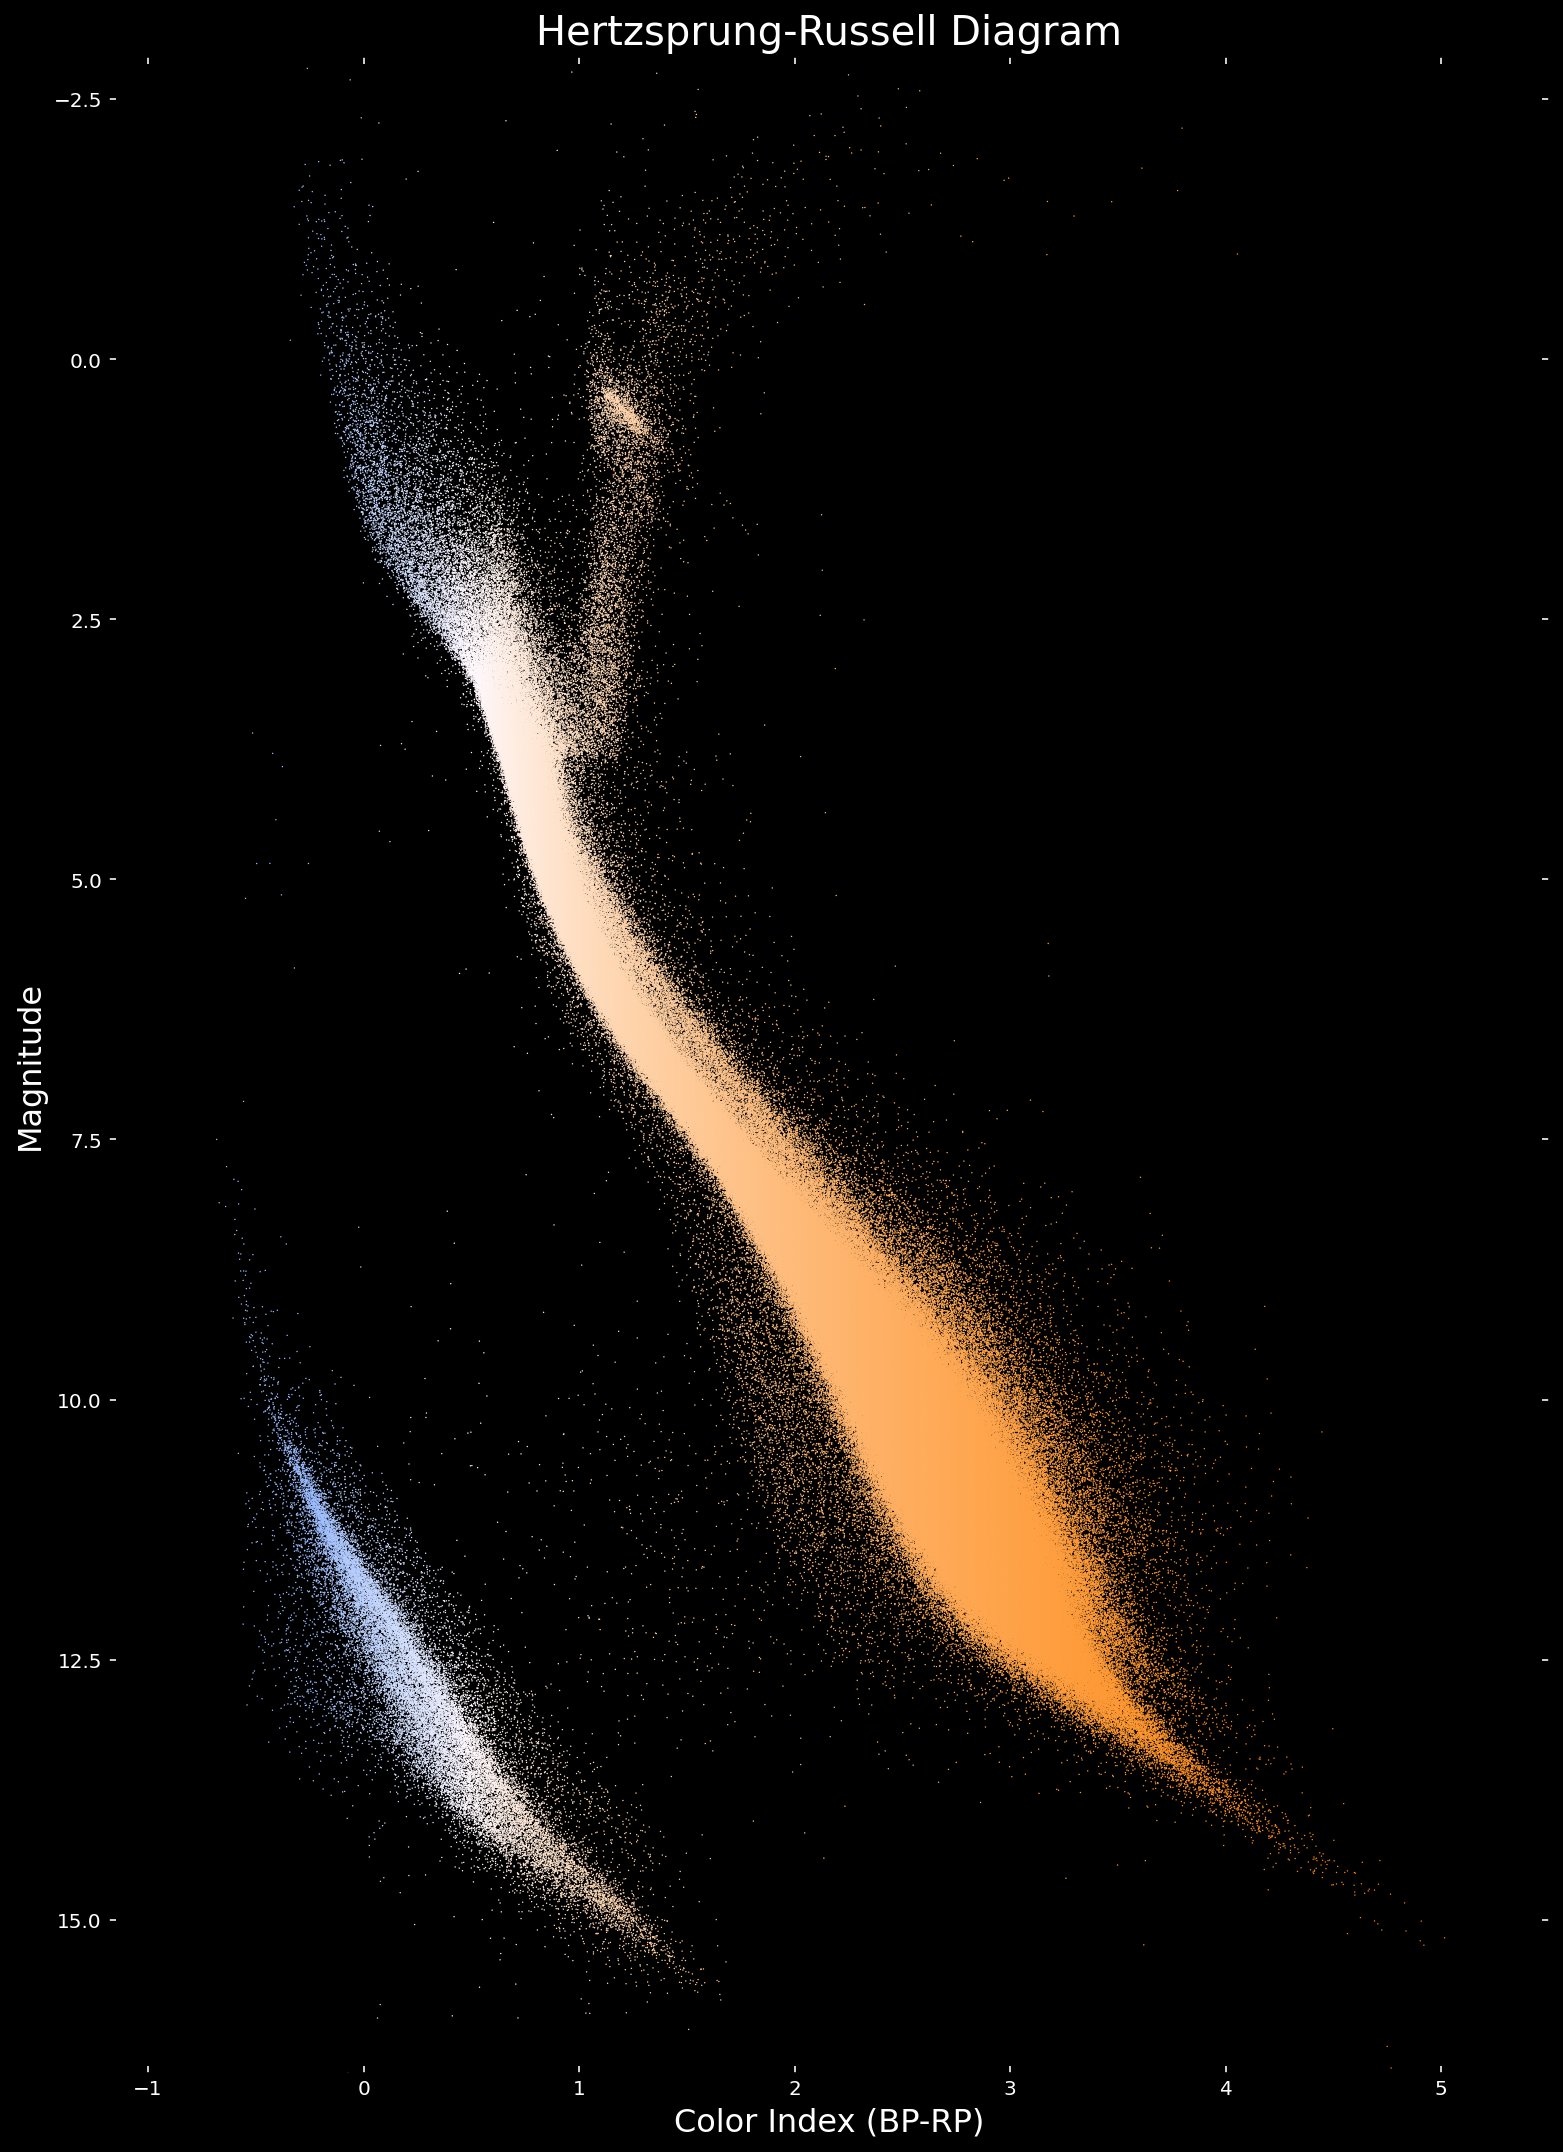

In [50]:
fig = plt.figure(
    figsize=(10, 14),
    facecolor='black'
    )
ax = fig.add_axes([1, 1, 1, 1])

ax.set_facecolor('black')
ax.set_title('Hertzsprung-Russell Diagram', color='white', fontsize=20)
ax.set_xlabel('Color Index (BP-RP)', color='white', fontsize=16)
ax.set_ylabel('Magnitude', color='white', fontsize=16)
ax.set_xlim(min(data.bp_rp) - .5, 5.5)#max(data.bp_rp))
ax.set_ylim(min(data.mg), max(data.mg))
ax.tick_params(top='off', right='off', direction='in', colors='white')
ax.scatter( data.bp_rp, data.mg,
    marker='.',
    s=2.0,
    alpha=1.0,
    zorder=0,
    facecolors=data['color'],
    color='w',
    linewidth=0)
ax.invert_yaxis()



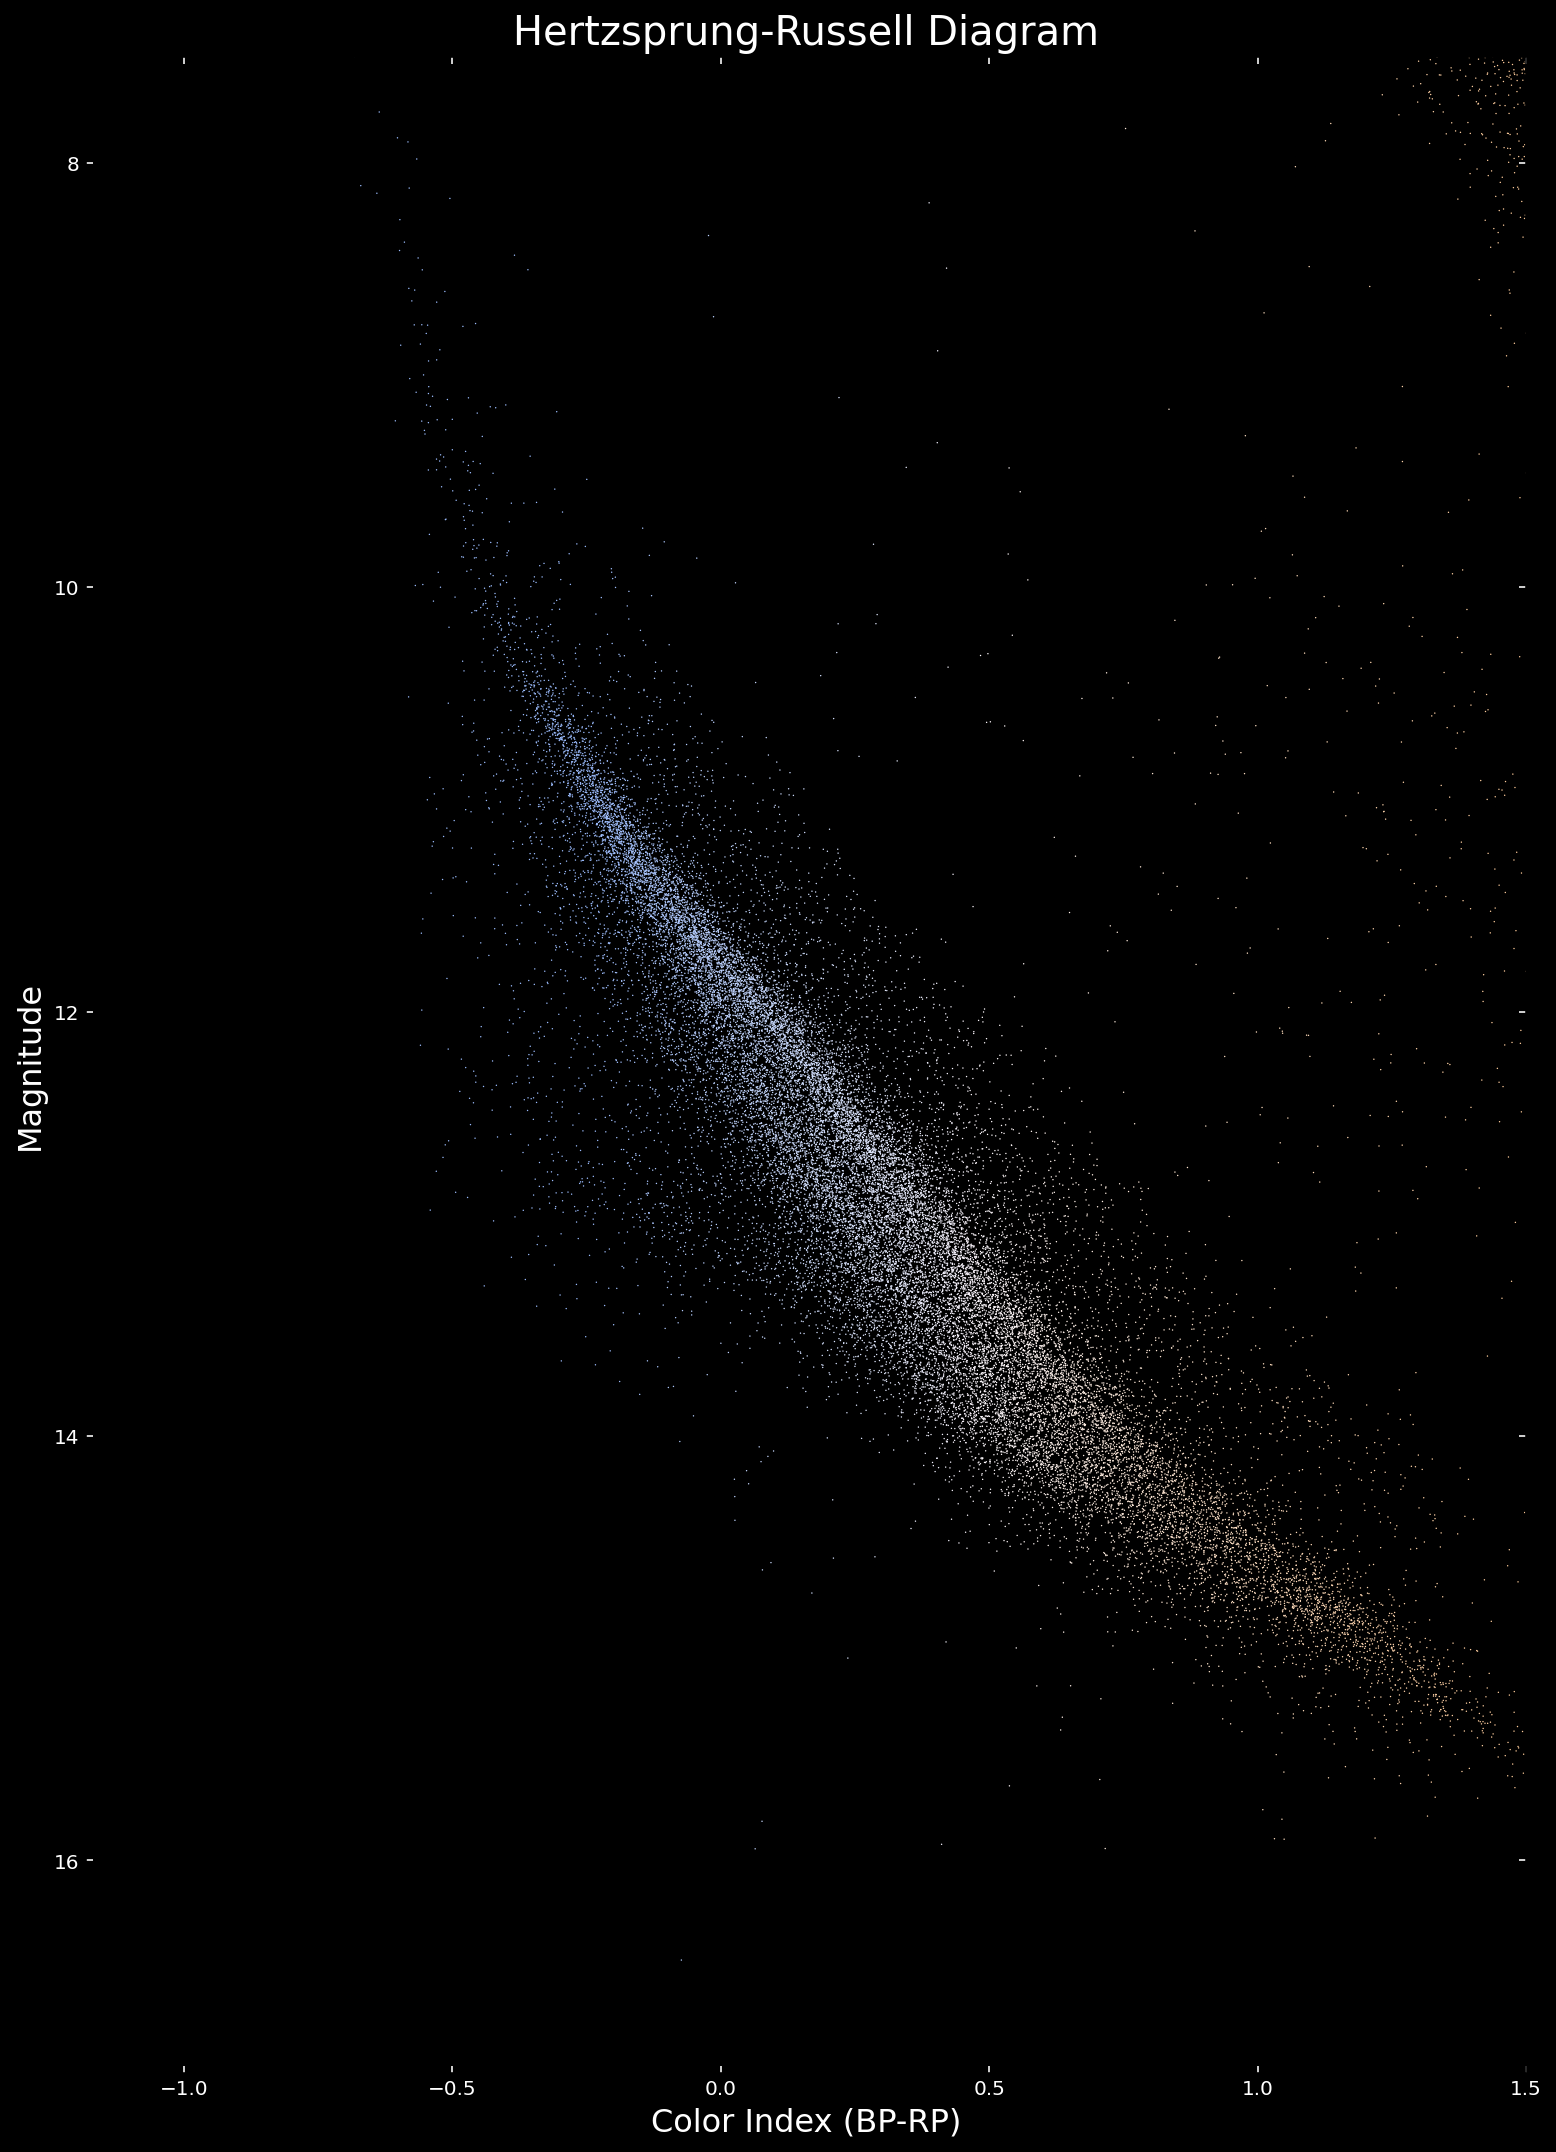

In [53]:
fig = plt.figure(
    figsize=(10, 14),
    facecolor='black'
    )
ax = fig.add_axes([1, 1, 1, 1])

ax.set_facecolor('black')
ax.set_title('Hertzsprung-Russell Diagram', color='white', fontsize=20)
ax.set_xlabel('Color Index (BP-RP)', color='white', fontsize=16)
ax.set_ylabel('Magnitude', color='white', fontsize=16)
ax.set_xlim(min(data.bp_rp) - .5, 1.5)
ax.set_ylim(17.0, 7.5)
ax.tick_params(top='off', right='off', direction='in', colors='white')
ax.scatter( data.bp_rp, data.mg,
    marker='.',
    s=2.0,
    alpha=1.0,
    zorder=0,
    facecolors=data['color'],
    color='w',
    linewidth=0)


In [54]:
from astropy.wcs import WCS